# Approximation Methods for Inhomogeneous Geometric Brownian Motion
**(IGBM, in other words GARCH Diffusion)**

In [34]:
from scipy import interpolate, integrate
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
# import qeds
# qeds.themes.mpl_style()
# plotly_template = qeds.themes.plotly_template()
# colors = qeds.themes.COLOR_CYCLE
%matplotlib inline

## Modification Term $W(x, x_0, T)$

In [5]:
from garchmodel import capriotti2018, generate_rv

In [41]:
def plot_figure(z1=None, z2=None, f1=None, f2=None, z1_name: str='z1', z2_name: str='z2', f1_name: str='f1', f2_name: str='f2'):
    plt.rcParams['figure.autolayout'] = True
    if z2 is None:
        fig, ax = plt.subplots()
        ax.plot(z1, f1)
        ax.set_title('Order n = {:.0f}'.format(order))
        ax.set_xlabel(z1_name)
        ax.set_ylabel(f1_name)
        ax.grid()
        plt.tight_layout()
    else:
        fig, ax = plt.subplots(2, 1, figsize=(7,4.5))
        ax1 = ax[0]
        ax2 = ax[1]

        ax1.plot(z1, f1)
        ax1.set_title('Order n = {:.0f}'.format(order))
        ax1.set_xlabel(z1_name)
        ax1.set_ylabel(f1_name)
        ax1.grid()
        plt.tight_layout()

        ax2.plot(z2, f2)
        ax1.set_xlabel(z2_name)
        ax2.set_ylabel(f2_name)
        ax2.grid()
#         plt.tight_layout()

In [12]:
# initial params
a = 0.1
b = 0.04
σ = 0.6
y0 = 0.06
x0 = np.log(y0)
T = 0.5

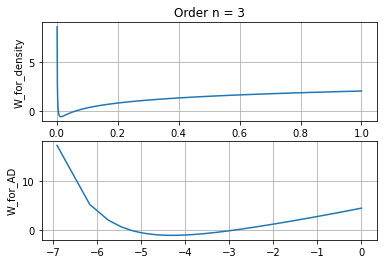

In [11]:
num = 50
order = 3
yvals = np.r_[np.linspace(0.001, y0-0.005, num), np.linspace(y0+0.005, 1.0, num)]
xvals = np.log(yvals)

volmodel = capriotti2018.ApproxMethod(a=a, b=b, sigma=σ)
w_density = volmodel.w_for_density(x=np.log(yvals), x0=np.log(y0), t=T, n=order)
w_adprice = volmodel.w_for_ADprice(x=np.log(yvals), x0=np.log(y0), t=T, n=order)

plot_figure(yvals, xvals, w_density, w_adprice, 'Y', 'X:=lnY', 'W_for_density', 'W_for_AD')

## Transition Density: $\rho(x, T|x_0, 0) \rightarrow \rho(y, T|y_0, 0)$

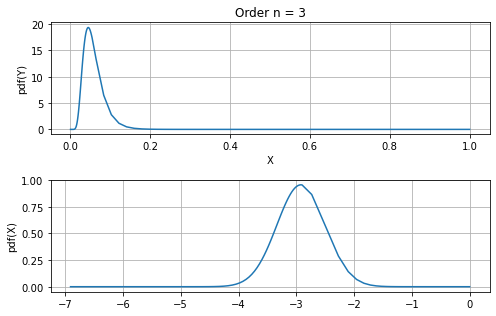

In [29]:
density_x = volmodel.transition_density_x(x=xvals, x0=x0, t=T, n=order)
density_y = volmodel.transition_density_y(y=yvals, y0=y0, t=T, n=order)
plot_figure(yvals, xvals, density_y, density_x, 'Y', 'X', 'pdf(Y)', 'pdf(X)')

<ipython-input-44-193b5935deb7>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  prob[i], _ = integrate.quad(lambda x: f_intpd(x), 0.001, yvals[i])


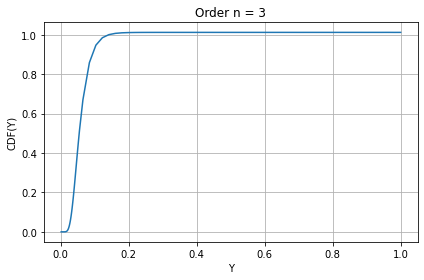

In [44]:
prob = np.zeros(yvals.size)
f_intpd = interpolate.interp1d(yvals, density_y)
for i in range(yvals.size):
    prob[i], _ = integrate.quad(lambda x: f_intpd(x), 0.001, yvals[i])
plot_figure(z1=yvals, f1=prob, z1_name='Y', f1_name='CDF(Y)')

## Arrow-Debreu (AD) price: $\psi(x, T|x_0, 0)$

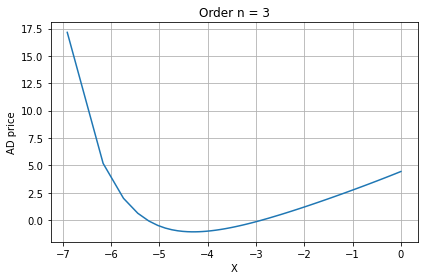

In [45]:
ad_prices = volmodel.w_for_ADprice(x=xvals, x0=x0, t=T, n=order)
plot_figure(z1=xvals, f1=ad_prices, z1_name='X', f1_name='AD price')

# Generate RNs for GARCH diffusion process

## Generated RNs vs. Density

C= 4.696362376005665 



D:\Proj\ASP\garchmodel\capriotti2018.py:213: RuntimeWarning: overflow encountered in exp
  np.exp(-(x-x0)**2 / (2*self.sigma**2*t) - self.w_for_density(x, x0, t, n))
D:\Proj\ASP\garchmodel\capriotti2018.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  (a ** 4 * b ** 4 - 8 * np.exp(x0) * a ** 4 * b ** 3 + 16 * np.exp(2 * x0) * a ** 4 * b ** 2 -
E:\Anaconda\installment\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\installment\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


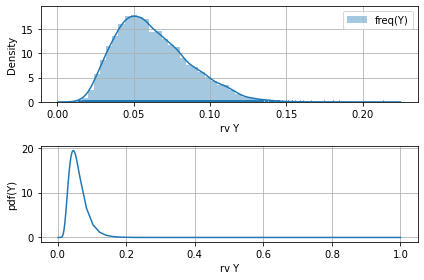

In [46]:
rvmodel = generate_rv.GenerateRN(a=a, b=b, sigma=σ, y0=y0, t=T)
rv = rvmodel.rv_for_garch(10000)
generate_rv.plot_freq(rv = rv, pdf_y=density_y, y=yvals)